In [62]:
import numpy as np 
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,Dense,ZeroPadding2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [43]:
data=mnist

In [44]:
np.shape(data)

()

In [45]:
x_train=data.train_images()/255
x_test=data.test_images()/255
y_test=data.test_labels()
y_train=data.train_labels()

In [46]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [47]:
np.shape(y_train),np.shape(y_test)


((60000,), (10000,))

In [48]:
np.shape(x_test)

(10000, 28, 28)

In [49]:
x_test=np.expand_dims(x_test,axis=3)
x_train=np.expand_dims(x_train,axis=3)



In [77]:
np.shape(x_test),np.shape(x_train)

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [78]:
model = Sequential([
    ZeroPadding2D(padding=(1,1),input_shape=(28,28,1)),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax'),

])

In [79]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_6 (ZeroPaddi  (None, 30, 30, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 zero_padding2d_7 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        18496     
                                                      

In [80]:
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [81]:
np.shape(y_test),np.shape(y_train),np.shape(x_train),np.shape(x_test)

((10000,), (60000,), (60000, 28, 28, 1), (10000, 28, 28, 1))

In [82]:
y_train_ohe= to_categorical(y_train)
y_test_ohe= to_categorical(y_test)

In [83]:
y_test_ohe[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [84]:
np.shape(y_train_ohe)

(60000, 10)

In [85]:
history=model.fit(x_train,y_train_ohe,epochs=10,validation_data=(x_test,y_test_ohe),batch_size=300)

Epoch 1/10
200/200 [==============================] - 69s 324ms/step - loss: 0.2919 - accuracy: 0.9153 - val_loss: 0.0741 - val_accuracy: 0.9767
Epoch 2/10
200/200 [==============================] - 67s 334ms/step - loss: 0.0685 - accuracy: 0.9797 - val_loss: 0.0494 - val_accuracy: 0.9839
Epoch 3/10
200/200 [==============================] - 66s 330ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0372 - val_accuracy: 0.9872
Epoch 4/10
200/200 [==============================] - 64s 322ms/step - loss: 0.0375 - accuracy: 0.9888 - val_loss: 0.0392 - val_accuracy: 0.9875
Epoch 5/10
200/200 [==============================] - 75s 377ms/step - loss: 0.0292 - accuracy: 0.9914 - val_loss: 0.0311 - val_accuracy: 0.9903
Epoch 6/10
200/200 [==============================] - 66s 331ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0314 - val_accuracy: 0.9893
Epoch 7/10
200/200 [==============================] - 62s 310ms/step - loss: 0.0215 - accuracy: 0.9935 - val_loss: 0.0290 - val_ac

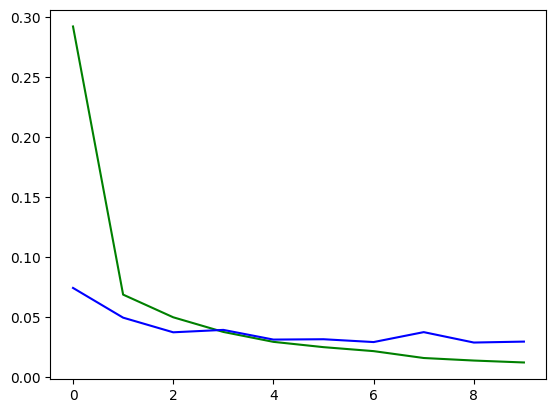

In [87]:
plt.plot(history.history['loss'],color='green',label='Train_Data')
plt.plot(history.history['val_loss'],color='blue',label='Test_Data')

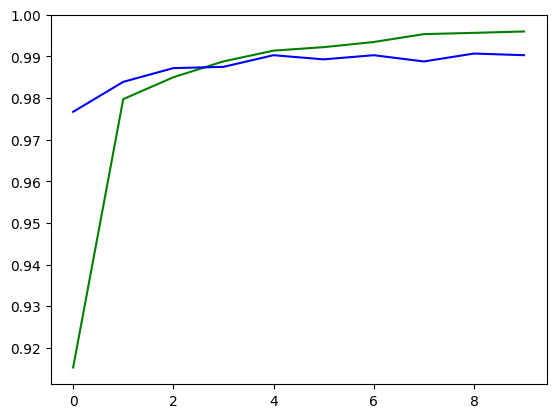

In [88]:
plt.plot(history.history['accuracy'],color='green',label='Train_Data')
plt.plot(history.history['val_accuracy'],color='blue',label='Test_Data')